# 导包

In [1]:
# 工作单位 ： 杭州电子科技大学
# 姓名 ： 罗会亮
# 开发时间 ： 2022/9/6 16:38
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor

from xgboost import  XGBRegressor

from lightgbm import LGBMRegressor

#支持向量机
from sklearn.svm import SVR

#评价标准
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures


# 数据聚合

In [2]:
#设置列数无限制
pd.set_option('display.max_columns',None)

# 数据聚合
train = pd.read_csv('./zhengqi_train.txt',sep = '\t')
test = pd.read_csv('./zhengqi_test.txt',sep = '\t')


In [3]:
# 增加一列
train['origin'] = 'train'
test['origin'] = 'test'
# 融合
data_all = pd.concat([train,test])

In [4]:
test.shape
data_all.shape

(4813, 40)

In [5]:
data_all.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target,origin
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,-0.940,-0.307,-0.073,0.550,-0.484,0.000,-1.707,-1.162,-0.573,-0.991,0.610,-0.400,-0.063,0.356,0.800,-0.223,0.796,0.168,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,0.188,-0.455,-0.134,1.109,-0.488,0.000,-0.977,-1.162,-0.571,-0.836,0.588,-0.802,-0.063,0.357,0.801,-0.144,1.057,0.338,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,0.874,-0.051,-0.072,0.767,-0.493,-0.212,-0.618,-0.897,-0.564,-0.558,0.576,-0.477,-0.063,0.355,0.961,-0.067,0.915,0.326,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,0.011,0.102,-0.014,0.769,-0.371,-0.162,-0.429,-0.897,-0.574,-0.564,0.272,-0.491,-0.063,0.352,1.435,0.113,0.898,0.277,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,-0.251,0.570,0.199,-0.349,-0.342,-0.138,-0.391,-0.897,-0.572,-0.394,0.106,0.309,-0.259,0.352,0.881,0.221,0.386,0.332,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384,train


In [6]:
data_all.tail()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target,origin
1920,-1.362,-1.553,-3.096,-0.444,0.381,1.375,-4.854,-5.331,-4.074,-3.838,-2.551,0.518,0.396,0.928,1.452,0.867,-5.143,1.227,-3.573,0.107,-0.088,0.227,2.953,-1.538,-0.630,-3.072,-1.120,-1.674,0.525,0.171,-4.488,-5.793,-4.050,-1.187,-0.852,-2.131,-2.564,0.597,NaN,test
1921,-2.698,-3.452,-3.620,-1.066,-1.385,1.378,-4.927,-5.103,-4.393,-1.683,-2.525,0.311,-1.786,1.871,1.885,1.135,-5.774,1.227,-0.965,0.193,-0.506,-0.574,3.149,-1.479,-0.204,-3.432,-2.101,-1.773,-0.446,1.297,-0.613,-7.698,-0.674,-1.187,-0.852,-2.131,-2.564,1.215,NaN,test
1922,-2.615,-3.564,-3.402,-0.422,-1.272,1.121,-4.223,-4.315,-5.196,-3.407,-2.529,-0.029,-1.151,1.976,2.337,0.504,-4.752,1.492,-1.568,0.301,0.109,-0.541,3.511,-1.085,1.057,-2.409,0.477,-1.585,-0.447,0.552,0.125,-6.111,0.275,-1.851,-1.548,-1.537,-2.544,1.612,NaN,test
1923,-2.661,-3.646,-3.271,-0.699,-1.270,1.116,-3.716,-3.809,-4.735,-2.976,-2.560,-0.028,-1.512,1.520,2.243,0.206,-4.200,1.492,-1.282,-0.036,-1.015,-0.203,3.511,-1.084,0.800,-2.339,0.050,-1.410,-0.447,0.318,1.086,-5.268,0.683,-1.645,-1.471,-1.537,-2.549,1.431,NaN,test
1924,-2.321,-3.037,-3.214,-1.594,-0.910,1.259,-3.616,-3.747,-4.368,-2.976,0.056,0.306,-1.154,0.847,2.221,0.206,-3.960,1.492,-1.213,0.592,-1.502,0.153,3.609,-1.088,0.799,-2.339,-0.077,-1.242,-0.442,0.323,-0.774,-5.211,1.618,-1.703,-1.471,-1.537,-1.123,1.988,NaN,test


# 特征探索

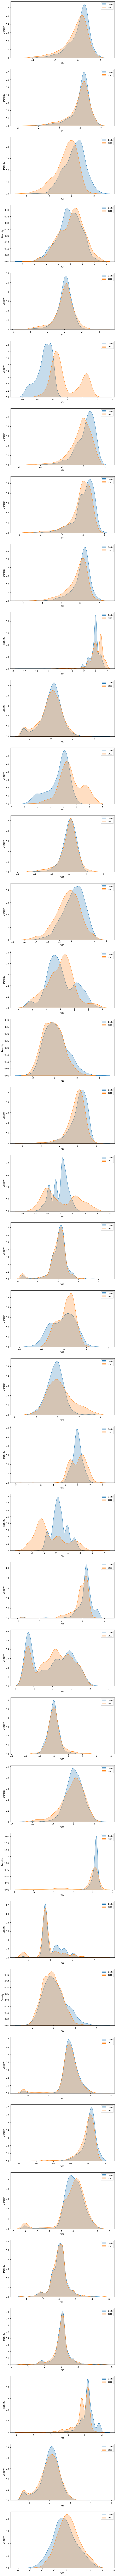

In [7]:
# 38个特征，将一些不重要的特征删除
# 特征分布情况，训练和测试数据 特征分布不均匀的删除
plt.figure(figsize=(9,38*6))
for i,col in enumerate(data_all.columns[:-2]):
    cond = data_all['origin'] == 'train'  #拿到训练数据的行号
    train_col = data_all[col][cond] #训练数据
    cond = data_all['origin'] == 'test'   #拿到测试数据的行号
    test_col = data_all[col][cond]  #测试数据
    axes = plt.subplot(38,1,i + 1)
    ax = sns.kdeplot(train_col,shade = True,ax = axes)
    sns.kdeplot(test_col,shade = True,ax = ax)
    plt.legend(['train','test'])
    plt.xlabel(col)

In [8]:
drop_labels = ['V11','V17','V22','V5']
data_all.drop(drop_labels,axis = 1,inplace=True) #axis = 1 表示删除列，axis = 0表示删除行
# inplace = TRUE 默认为False,表明原数组内容并不改变，如果我们需要得到改变后的内容，需要将新结果赋给一个新的数组
data_all.shape

(4813, 36)

# 相关性系数corr

In [9]:
#协方差
cov = data_all.cov()
cov.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V14,V15,V16,V18,V19,V20,V21,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000025,0.903982,0.340467,0.359285,0.784839,0.180416,0.151922,0.767856,0.053450,0.321419,0.724819,0.227613,0.047217,0.351832,0.304059,0.148834,-0.121430,0.381376,0.057697,0.235854,-0.322164,-0.277353,-0.068489,0.170782,0.024270,0.329480,0.172896,0.508813,0.064374,0.034760,-0.026891,0.162476,0.254698,-0.498201,0.797374
V1,0.903982,1.000031,0.401578,0.359448,0.656987,0.262892,0.213077,0.856050,0.127983,0.333186,0.615086,0.189003,0.026079,0.177391,0.404681,0.132534,-0.106672,0.396083,0.041882,0.226535,-0.224249,-0.133716,0.014211,0.202618,0.054309,0.150990,0.184071,0.605021,0.095879,0.016321,-0.028009,0.167848,0.258554,-0.515544,0.807694
V2,0.340467,0.401578,1.000015,0.232290,-0.100511,0.725991,0.585969,0.676653,-0.027423,0.348495,-0.108489,0.224002,-0.114313,-0.248114,0.772750,0.151140,-0.034183,0.191231,-0.242018,0.197310,0.050903,0.469464,0.254910,0.432605,0.161623,-0.287456,0.172618,0.655908,0.117064,0.052609,0.045029,0.216463,0.322302,-0.676201,0.572834
V3,0.359285,0.359448,0.232290,0.999990,0.277334,0.171312,0.175983,0.352145,0.088102,0.354042,0.254820,-0.089332,-0.229731,0.129332,0.333416,0.027459,-0.129963,0.400037,0.030133,0.037059,-0.181597,-0.095099,-0.017148,0.315397,0.123925,0.100186,0.049129,0.341597,-0.064783,-0.005906,-0.050442,0.029781,0.350874,-0.177361,0.488898
V4,0.784839,0.656987,-0.100511,0.277334,1.000030,-0.144967,-0.052794,0.384392,-0.023432,0.152349,0.928831,0.134826,0.115968,0.593238,-0.016419,0.079489,-0.244627,0.210922,0.321325,0.117996,-0.494599,-0.497591,-0.137865,-0.021778,-0.028968,0.624850,0.039329,0.278575,-0.053261,0.009041,-0.048526,0.037116,0.125260,-0.060457,0.527962


In [10]:
#相关性系数
corr = data_all.corr()
corr.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V14,V15,V16,V18,V19,V20,V21,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.903956,0.340461,0.359282,0.784818,0.180407,0.151916,0.767851,0.053435,0.321410,0.724800,0.227610,0.047217,0.351828,0.304055,0.148831,-0.121418,0.381375,0.057694,0.235851,-0.322101,-0.277339,-0.068486,0.170780,0.024269,0.329477,0.172895,0.508807,0.064368,0.034757,-0.026891,0.162464,0.254690,-0.498186,0.873212
V1,0.903956,1.000000,0.401569,0.359444,0.656967,0.262878,0.213067,0.856041,0.127948,0.333175,0.615068,0.188999,0.026078,0.177389,0.404674,0.132532,-0.106661,0.396081,0.041880,0.226531,-0.224204,-0.133709,0.014210,0.202615,0.054306,0.150988,0.184069,0.605012,0.095870,0.016320,-0.028008,0.167835,0.258545,-0.515528,0.871846
V2,0.340461,0.401569,1.000000,0.232290,-0.100508,0.725961,0.585948,0.676652,-0.027415,0.348486,-0.108487,0.224000,-0.114312,-0.248113,0.772744,0.151138,-0.034179,0.191231,-0.242005,0.197308,0.050893,0.469443,0.254899,0.432603,0.161617,-0.287455,0.172618,0.655904,0.117054,0.052605,0.045029,0.216448,0.322294,-0.676184,0.638878
V3,0.359282,0.359444,0.232290,1.000000,0.277331,0.171307,0.175978,0.352149,0.088080,0.354038,0.254818,-0.089332,-0.229732,0.129332,0.333417,0.027459,-0.129953,0.400043,0.030132,0.037059,-0.181565,-0.095096,-0.017148,0.315399,0.123922,0.100186,0.049129,0.341599,-0.064779,-0.005905,-0.050442,0.029779,0.350869,-0.177359,0.512074
V4,0.784818,0.656967,-0.100508,0.277331,1.000000,-0.144960,-0.052792,0.384388,-0.023426,0.152344,0.928805,0.134824,0.115966,0.593230,-0.016419,0.079487,-0.244603,0.210921,0.321305,0.117994,-0.494501,-0.497565,-0.137858,-0.021778,-0.028966,0.624843,0.039329,0.278571,-0.053256,0.009040,-0.048525,0.037113,0.125256,-0.060455,0.603984


# $$corr = cov /(std1 * std2) $$

In [11]:
cond = corr.loc['target'].abs() < 0.1 #筛选相关系数绝对值小于0.1的值
#通过相关性找到七个相关性不大的属性
# 查看了属性的分布，分布不好的删除
drop_labels = ['V14', 'V21']
data_all.drop(drop_labels,axis = 1,inplace=True)

In [12]:
data_all.shape

(4813, 34)

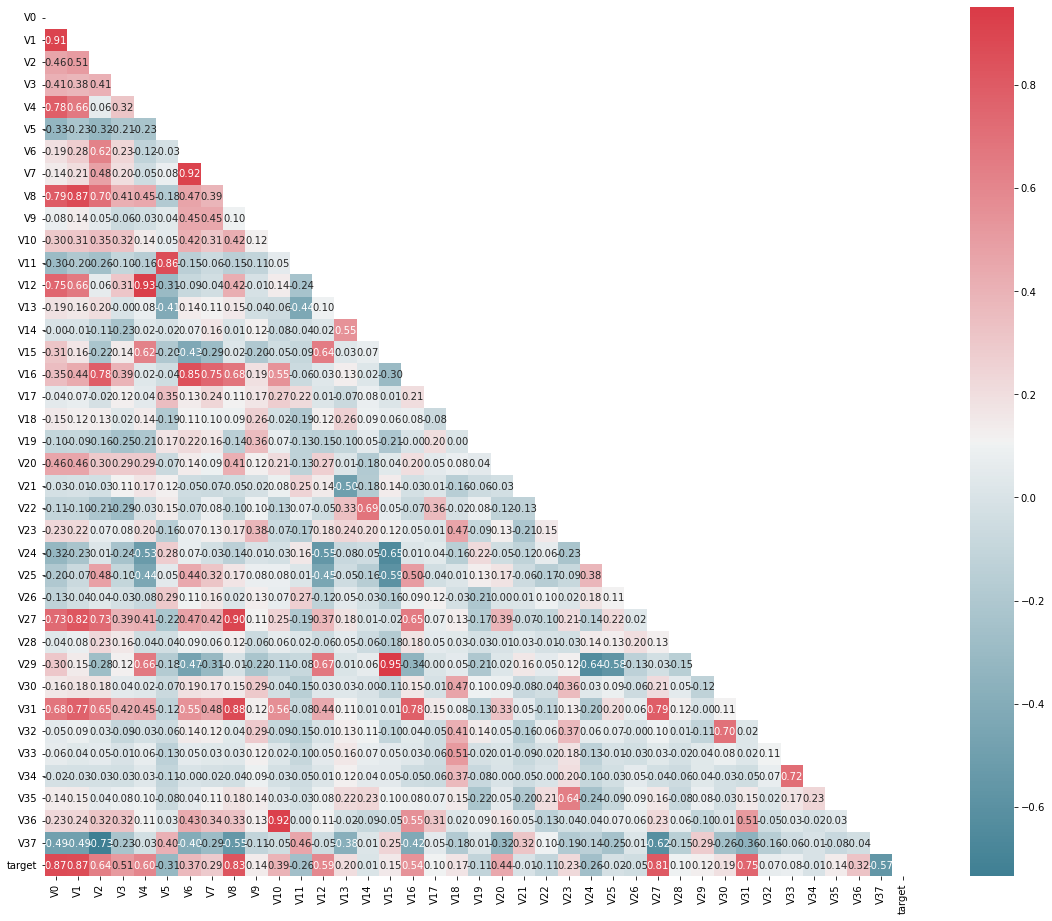

In [13]:
#找出相关程度
plt.figure(figsize = (20,16))
mcorr = train.corr()#相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr,dtype=bool) #构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True #角分线右侧设为True
# np.triu_indices_from(mask) 返回的是索引
# 颜色
cmap = sns.diverging_palette(220,10,as_cmap= True) #返回matplotlib colormap对象
g = sns.heatmap(mcorr,mask=mask,cmap=cmap,square=True,annot=True,fmt='0.2f') #绘制热力图
plt.show()

# 归一化操作 标准化

In [14]:
data_all[data_all['origin'] == 'test'].describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,0.0
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,-0.274092,-0.173971,-0.266709,0.255114,-0.051709,-0.034592,-0.293726,-0.144125,-0.170339,-0.082423,0.172829,0.279249,-0.233952,0.032064,0.077170,-0.108471,-0.408566,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735,NaN
std,1.073333,1.076670,0.969541,1.034925,1.147286,1.054119,1.040101,1.085916,1.014394,1.043967,1.139994,1.039017,0.930072,1.001178,1.060944,0.778954,1.199153,0.986066,0.947513,1.110116,1.137409,1.453598,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599,NaN
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-5.649000,-5.625000,-6.059000,-6.784000,-2.583000,-5.505000,-4.087000,-2.376000,-6.060000,-3.583000,-1.904000,-2.861000,-5.552000,-1.339000,-4.732000,-4.891000,-6.874000,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000,NaN
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,-0.732000,-0.509000,-0.775000,-0.390000,-0.568000,-0.473000,-0.923000,-0.839000,-0.597000,-0.384000,-0.412000,-0.569000,-0.216000,-0.631000,-0.535000,-0.731000,-0.124000,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000,NaN
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,-0.082000,0.018000,-0.004000,0.401000,0.079000,0.132000,-0.204000,-0.198000,-0.005000,0.075000,0.291000,0.107000,-0.162000,0.093000,-0.026000,0.063000,0.179000,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000,NaN
75%,0.549000,0.589000,0.278000,0.793000,0.610000,0.457000,0.515000,0.482000,0.904000,0.634000,0.583000,0.412000,0.493000,0.464000,0.438000,0.746000,0.966000,0.356000,0.800000,0.460000,0.682000,0.317000,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000,NaN
max,2.100000,2.120000,1.946000,2.603000,4.475000,1.528000,1.394000,2.408000,1.766000,3.118000,4.011000,2.587000,3.073000,2.033000,4.440000,2.196000,4.056000,1.354000,1.795000,6.616000,2.472000,0.786000,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000,NaN


In [15]:
data_all[data_all['origin'] == 'train'].describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,0.182892,0.116155,0.177856,-0.169452,0.034319,0.023177,0.195738,0.096146,0.113505,0.055034,-0.114884,-0.186226,0.155978,-0.021813,-0.051679,0.072092,0.272407,0.137712,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.918054,0.955116,0.895444,0.953813,0.968272,0.894092,0.922757,1.033048,0.983128,0.953466,1.108859,0.788511,0.978757,1.033403,0.915957,0.889771,0.270374,0.929899,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-4.576000,-5.048000,-4.692000,-12.891000,-2.584000,-5.165000,-3.675000,-2.903000,-5.981000,-3.582000,-3.704000,-3.402000,-5.542000,-1.344000,-3.808000,-5.131000,-1.164000,-2.435000,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.310000,-0.295000,-0.159000,-0.390000,-0.420500,-0.419000,-0.398000,-0.662250,-0.300000,-0.367500,-0.987500,-0.675500,0.097250,-1.191000,-0.557250,-0.452000,0.157750,-0.455000,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,0.388000,0.344000,0.362000,0.042000,0.157000,0.123000,0.289500,-0.000500,0.306000,0.082000,-0.000500,-0.156500,0.338000,0.095000,-0.076000,0.075000,0.325000,-0.447000,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,0.831250,0.782250,0.726000,0.042000,0.619250,0.616000,0.864250,0.730000,0.774250,0.513250,0.737250,0.304000,0.368250,0.931250,0.356000,0.644250,0.442000,0.730000,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,1.895000,1.918000,2.245000,1.335000,4.830000,2.657000,2.475000,4.314000,2.861000,4.441000,3.431000,3.525000,1.906000,2.423000,7.284000,2.980000,0.925000,4.671000,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [17]:
stand = StandardScaler()
data = data_all.iloc[:,:-2] #对数据进行切片
data2 = stand.fit_transform(data) 

array([[ 0.56597193,  0.01591954, -0.14297122, ..., -5.1011359 ,
        -2.60811143, -3.50838833],
       [ 0.96800866,  0.43695666,  0.06604898, ...,  0.36409451,
        -0.33491851, -0.7301463 ],
       [ 1.01301277,  0.56796822,  0.23506531, ...,  0.36409451,
         0.76517485, -0.58913402],
       ...,
       [-2.61531873, -3.56439613, -3.4022862 , ..., -1.53698564,
        -2.54410599,  1.61205774],
       [-2.66132294, -3.64640336, -3.27127354, ..., -1.53698564,
        -2.54910642,  1.43104197],
       [-2.32129187, -3.03734966, -3.21426803, ..., -1.53698564,
        -1.12298539,  1.9880905 ]])

In [18]:
#转换格式
cols = data_all.columns
data_all_std = pd.DataFrame(data2,columns=cols[:-2])
data_all_std

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.565972,0.015920,-0.142971,0.407057,0.451955,-1.812243,-2.360292,-0.436096,-2.114034,-0.939993,-0.073078,0.550083,-0.000048,-1.707156,-0.573113,-0.991209,0.610125,0.356014,0.800200,-0.222870,0.796179,0.167972,-0.449926,0.136001,0.109006,-0.615061,0.326836,-4.627276,-4.789544,-5.101136,-2.608111,-3.508388
1,0.968009,0.436957,0.066049,0.566074,0.193932,-1.566226,-2.360292,0.331988,-2.114034,0.188105,-0.134084,1.109140,-0.000048,-0.977080,-0.571113,-0.836206,0.588122,0.357014,0.801200,-0.143865,1.057196,0.337989,0.671155,-0.128028,0.124008,0.032007,0.599843,-0.843138,0.159981,0.364095,-0.334919,-0.730146
2,1.013013,0.567968,0.235065,0.370053,0.111925,-1.367212,-2.360292,0.395995,-2.114034,0.874165,-0.072078,0.767105,-0.212070,-0.618043,-0.564112,-0.558201,0.576121,0.355014,0.961187,-0.066860,0.915187,0.325988,1.287200,-0.009015,0.361034,0.277033,-0.116176,-0.843138,0.159981,0.364095,0.765175,-0.589134
3,0.732987,0.367951,0.283070,0.165031,0.598968,-1.200201,-2.086271,0.402996,-2.114034,0.011090,-0.014073,0.769105,-0.162065,-0.429023,-0.574113,-0.564201,0.272086,0.352014,1.435149,0.113152,0.898186,0.276983,1.298201,0.014988,0.417040,0.279033,0.602844,-0.843138,-0.065042,0.364095,0.333138,-0.112092
4,0.683983,0.637974,0.260068,0.209035,0.336945,-1.073192,-2.086271,0.313986,-2.114034,-0.250933,0.198947,-0.349009,-0.138063,-0.391019,-0.572113,-0.394197,0.106068,0.352014,0.881193,0.221159,0.386151,0.331989,1.289200,0.183006,1.078113,0.328038,0.417839,-0.843138,-0.215058,0.364095,-0.279914,-0.028085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,-1.362204,-1.553219,-3.096257,-0.444036,0.380949,-4.854453,-5.331512,-4.074495,-3.837771,-2.551133,0.395964,0.928122,0.867044,-5.143511,-3.573409,0.106813,-0.087954,-1.538177,-0.629685,-3.072059,-1.119949,-1.674221,0.525145,0.171004,-4.488502,-5.793606,-4.050283,-1.187151,-0.852126,-2.131011,-2.564108,0.596969
4809,-2.698326,-3.452386,-3.620307,-1.066103,-1.385208,-4.927458,-5.103495,-4.393530,-1.683100,-2.525131,-1.786233,1.871218,1.135072,-5.774577,-0.965152,0.192815,-0.506002,-1.479171,-0.203719,-3.432082,-2.101015,-1.773231,-0.445926,1.297125,-0.613074,-7.698806,-0.674191,-1.187151,-0.852126,-2.131011,-2.564108,1.215023
4810,-2.615319,-3.564396,-3.402286,-0.422033,-1.272198,-4.223410,-4.315437,-5.196618,-3.406837,-2.529131,-1.151175,1.976228,0.504005,-4.752471,-1.568211,0.300817,0.109068,-1.085132,1.057179,-2.409015,0.477157,-1.585212,-0.446926,0.552045,0.125008,-6.111639,0.274835,-1.851175,-1.548200,-1.536986,-2.544106,1.612058
4811,-2.661323,-3.646403,-3.271274,-0.699063,-1.270198,-3.716375,-3.809399,-4.735567,-2.975902,-2.560134,-1.512208,1.520182,0.205974,-4.200414,-1.282183,-0.036190,-1.015059,-1.084132,0.800200,-2.339010,0.050129,-1.410193,-0.446926,0.318020,1.086114,-5.268550,0.682846,-1.645168,-1.471192,-1.536986,-2.549106,1.431042


In [19]:
data_all.index = np.arange(4813) #索引有重复 ，重新设置
data_all

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target,origin
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-2.114,-0.940,-0.073,0.550,0.000,-1.707,-0.573,-0.991,0.610,0.356,0.800,-0.223,0.796,0.168,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,-2.114,0.188,-0.134,1.109,0.000,-0.977,-0.571,-0.836,0.588,0.357,0.801,-0.144,1.057,0.338,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,-2.114,0.874,-0.072,0.767,-0.212,-0.618,-0.564,-0.558,0.576,0.355,0.961,-0.067,0.915,0.326,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,-2.114,0.011,-0.014,0.769,-0.162,-0.429,-0.574,-0.564,0.272,0.352,1.435,0.113,0.898,0.277,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-2.114,-0.251,0.199,-0.349,-0.138,-0.391,-0.572,-0.394,0.106,0.352,0.881,0.221,0.386,0.332,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,-1.362,-1.553,-3.096,-0.444,0.381,-4.854,-5.331,-4.074,-3.838,-2.551,0.396,0.928,0.867,-5.143,-3.573,0.107,-0.088,-1.538,-0.630,-3.072,-1.120,-1.674,0.525,0.171,-4.488,-5.793,-4.050,-1.187,-0.852,-2.131,-2.564,0.597,NaN,test
4809,-2.698,-3.452,-3.620,-1.066,-1.385,-4.927,-5.103,-4.393,-1.683,-2.525,-1.786,1.871,1.135,-5.774,-0.965,0.193,-0.506,-1.479,-0.204,-3.432,-2.101,-1.773,-0.446,1.297,-0.613,-7.698,-0.674,-1.187,-0.852,-2.131,-2.564,1.215,NaN,test
4810,-2.615,-3.564,-3.402,-0.422,-1.272,-4.223,-4.315,-5.196,-3.407,-2.529,-1.151,1.976,0.504,-4.752,-1.568,0.301,0.109,-1.085,1.057,-2.409,0.477,-1.585,-0.447,0.552,0.125,-6.111,0.275,-1.851,-1.548,-1.537,-2.544,1.612,NaN,test
4811,-2.661,-3.646,-3.271,-0.699,-1.270,-3.716,-3.809,-4.735,-2.976,-2.560,-1.512,1.520,0.206,-4.200,-1.282,-0.036,-1.015,-1.084,0.800,-2.339,0.050,-1.410,-0.447,0.318,1.086,-5.268,0.683,-1.645,-1.471,-1.537,-2.549,1.431,NaN,test


In [20]:
data_all_std = pd.merge(data_all_std,data_all.iloc[:,-2:],right_index=True,left_index=True)
data_all_std.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target,origin
0,0.565972,0.015920,-0.142971,0.407057,0.451955,-1.812243,-2.360292,-0.436096,-2.114034,-0.939993,-0.073078,0.550083,-0.000048,-1.707156,-0.573113,-0.991209,0.610125,0.356014,0.800200,-0.222870,0.796179,0.167972,-0.449926,0.136001,0.109006,-0.615061,0.326836,-4.627276,-4.789544,-5.101136,-2.608111,-3.508388,0.175,train
1,0.968009,0.436957,0.066049,0.566074,0.193932,-1.566226,-2.360292,0.331988,-2.114034,0.188105,-0.134084,1.109140,-0.000048,-0.977080,-0.571113,-0.836206,0.588122,0.357014,0.801200,-0.143865,1.057196,0.337989,0.671155,-0.128028,0.124008,0.032007,0.599843,-0.843138,0.159981,0.364095,-0.334919,-0.730146,0.676,train
2,1.013013,0.567968,0.235065,0.370053,0.111925,-1.367212,-2.360292,0.395995,-2.114034,0.874165,-0.072078,0.767105,-0.212070,-0.618043,-0.564112,-0.558201,0.576121,0.355014,0.961187,-0.066860,0.915187,0.325988,1.287200,-0.009015,0.361034,0.277033,-0.116176,-0.843138,0.159981,0.364095,0.765175,-0.589134,0.633,train
3,0.732987,0.367951,0.283070,0.165031,0.598968,-1.200201,-2.086271,0.402996,-2.114034,0.011090,-0.014073,0.769105,-0.162065,-0.429023,-0.574113,-0.564201,0.272086,0.352014,1.435149,0.113152,0.898186,0.276983,1.298201,0.014988,0.417040,0.279033,0.602844,-0.843138,-0.065042,0.364095,0.333138,-0.112092,0.206,train
4,0.683983,0.637974,0.260068,0.209035,0.336945,-1.073192,-2.086271,0.313986,-2.114034,-0.250933,0.198947,-0.349009,-0.138063,-0.391019,-0.572113,-0.394197,0.106068,0.352014,0.881193,0.221159,0.386151,0.331989,1.289200,0.183006,1.078113,0.328038,0.417839,-0.843138,-0.215058,0.364095,-0.279914,-0.028085,0.384,train


In [21]:
data_all_std.describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,2888.000000
mean,2.837262e-16,4.382763e-17,3.743341e-16,-6.892471e-17,-5.845222e-17,-2.089886e-16,-3.317982e-16,-7.030874e-17,4.439047e-15,-6.738930e-17,2.294722e-16,-2.163931e-16,-1.076199e-16,4.170545e-17,-5.893663e-16,1.626928e-16,3.553729e-16,2.431741e-16,-5.574874e-16,-1.033409e-17,1.495704e-16,3.121450e-16,1.340053e-15,-5.744187e-16,-4.719544e-17,-1.978241e-16,-8.304182e-19,1.225328e-16,-1.677445e-16,-1.036869e-14,1.626236e-16,-1.646535e-16,0.126353
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,0.983966
min,-4.814520e+00,-5.488566e+00,-4.283371e+00,-3.956418e+00,-4.921523e+00,-5.649508e+00,-5.625534e+00,-6.059712e+00,-1.288939e+01,-2.584136e+00,-5.505569e+00,-4.087390e+00,-2.903355e+00,-6.060606e+00,-3.583410e+00,-3.704265e+00,-3.402329e+00,-5.552583e+00,-1.343627e+00,-4.732168e+00,-5.131218e+00,-6.874765e+00,-2.435070e+00,-2.912326e+00,-4.507504e+00,-7.698806e+00,-4.057283e+00,-4.627276e+00,-4.789544e+00,-7.477236e+00,-2.608111e+00,-3.630399e+00,-3.044000
25%,-4.681226e-01,-3.191100e-01,-6.250178e-01,-6.510581e-01,-4.281231e-01,-4.941518e-01,-3.681437e-01,-4.290956e-01,-3.902971e-01,-4.759526e-01,-4.341107e-01,-6.170359e-01,-7.451267e-01,-4.450251e-01,-3.790941e-01,-7.472045e-01,-6.390166e-01,-1.870409e-01,-1.190640e+00,-5.518919e-01,-5.359103e-01,5.595993e-02,-4.539264e-01,-7.210913e-01,-3.010393e-01,-3.000276e-01,-4.281845e-01,-4.991259e-01,-2.900663e-01,-3.489356e-01,-4.849312e-01,-6.661407e-01,-0.350250
50%,2.449426e-01,2.369390e-01,1.050527e-01,7.302061e-02,1.139252e-01,1.908956e-01,1.978983e-01,2.309767e-01,4.163690e-02,1.331003e-01,1.249398e-01,1.030375e-01,-7.805624e-02,1.870403e-01,7.795097e-02,1.508138e-01,-6.595178e-02,3.310114e-01,9.425669e-02,-5.985935e-02,7.013018e-02,2.699823e-01,-4.459258e-01,-9.702433e-02,3.799817e-02,2.170268e-01,9.182964e-02,-4.010929e-02,1.599815e-01,3.640945e-01,1.151197e-01,-4.308645e-02,0.313000
75%,6.659811e-01,5.949706e-01,6.981101e-01,7.040892e-01,5.759663e-01,7.049312e-01,6.839344e-01,6.370211e-01,9.035053e-01,6.261431e-01,6.039831e-01,7.181002e-01,6.330189e-01,6.600893e-01,4.429870e-01,7.418258e-01,4.961118e-01,3.600143e-01,8.211981e-01,4.061715e-01,6.571694e-01,3.989958e-01,5.001429e-01,6.230529e-01,4.690458e-01,5.780648e-01,5.868431e-01,4.189074e-01,2.729934e-01,3.640945e-01,6.471648e-01,6.469737e-01,0.793250
max,2.121114e+00,2.120105e+00,2.828316e+00,2.603296e+00,4.475314e+00,1.895013e+00,1.918026e+00,2.408215e+00,1.765374e+00,4.830508e+00,4.011291e+00,2.587291e+00,4.314408e+00,2.861317e+00,4.441381e+00,3.430881e+00,4.056514e+00,1.906171e+00,2.423069e+00,7.284627e+00,2.980325e+00,9.250508e-01,4.671446e+00,4.580477e+00,3.139341e+00,2.013216e+00,2.394892e+00,5.465091e+00,5.110507e+00,2.324177e+00,5.238554e+00,3.021181e+00,2.538000


# 使用不同的算法进行训练

In [23]:
#异常值
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,0.2,0.5,1,2,3,4,5,10,20,30,50])

cond = data_all_std['origin'] == 'train'

X_train = data_all_std[cond].iloc[:,:-2]

#真实值
y_train = data_all_std[cond]['target']

ridge.fit(X_train,y_train)

#预测值，偏差特别大的，可以当成异常值
y_ = ridge.predict(X_train)

In [24]:
display(y_train[:100].array)
display(y_[:100])

<PandasArray>
[ 0.175,  0.676,  0.633,  0.206,  0.384,   0.06,  0.415,  0.609,  0.981,
  0.818,  0.877,  1.077, -1.099, -1.656, -0.615, -1.366, -0.345, -1.625,
 -0.735, -0.153,  0.054,  0.037,  0.295,  0.064, -2.586, -2.613, -0.073,
  1.273,  1.849,  0.718,  0.396, -0.553, -0.308, -0.496,   0.71,  0.977,
  0.894,  0.487, -0.169, -1.083,  0.116, -0.564, -0.373,  0.169,  0.408,
  0.864,  1.168,  0.972,  1.083,  0.922,  0.442,  0.385,  0.193,  0.017,
  0.505,  0.705,  0.529, -0.061, -0.401, -0.111,  0.387, -0.007,  0.053,
  0.838,  0.647,  0.079,  0.829,  0.921,  0.692, -0.548,  1.291,  0.802,
 -0.527, -0.121, -0.624, -0.399, -0.618, -0.698, -0.198,  0.282,   0.52,
 -0.083,  0.993,  0.508,   0.87,  1.144,  0.812,  0.515,  0.521,  0.714,
  1.114,  1.085,  1.249,  0.436,  0.764,  0.752,  0.669, -0.144,    0.9,
  0.194]
Length: 100, dtype: float64

array([ 0.65318867,  0.71275035,  0.69362227,  0.28898439,  0.4479004 ,
        0.36250468,  0.58279597,  0.67166266,  0.87296349,  1.06488146,
        1.1413889 ,  1.12243867, -0.88623488, -1.14889652, -0.34171769,
       -1.16685546, -0.40795864, -1.42322643, -0.42487414,  0.21467639,
        0.37151243,  0.170565  ,  0.62528808, -0.03011435, -1.89435822,
       -1.99677837,  0.33755341,  1.03540797,  1.21906679,  0.52620004,
        0.26398215, -0.32156824, -0.53156134, -0.53254366,  0.3874812 ,
        0.794076  ,  0.60651551,  0.3343749 , -0.05201473, -0.95576618,
        0.02081612, -0.431106  , -0.05362072,  0.38313976,  0.31100503,
        0.68337733,  0.88392452,  0.75995641,  0.90541933,  0.59103402,
        0.27605932,  0.38424375,  0.18511788, -0.08736878, -0.05382013,
       -0.0162776 ,  0.06533352, -0.47778469, -0.49498899, -0.36495886,
        0.35780075, -0.08733545, -0.24388165,  0.69805776,  0.98938729,
        0.59536401,  0.61622833,  0.49843357,  0.4463546 ,  0.15

# $$\sigma$$

In [25]:
cond = (y_train - y_).abs() > y_train.std() * 0.8#落在（μ-σ,μ+σ）之外的均为异常值
cond.sum()

88

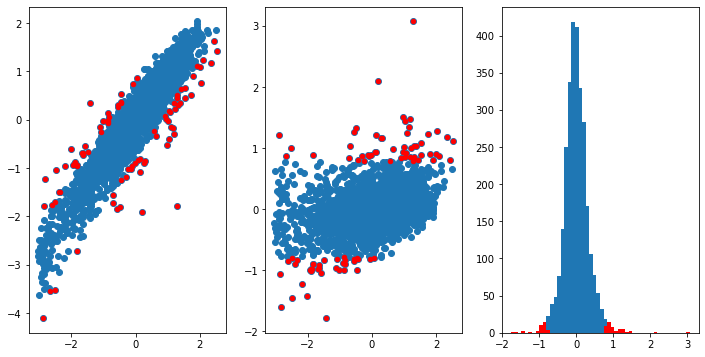

In [26]:
#画图
plt.figure(figsize=(12,6))
axes = plt.subplot(1,3,1)
axes.scatter(y_train,y_)
axes.scatter(y_train[cond],y_[cond],c = 'red',s = 20)


axes = plt.subplot(1,3,2)
axes.scatter(y_train,y_train - y_)
axes.scatter(y_train[cond],(y_train - y_)[cond],c = 'red',s = 20)

axes = plt.subplot(1,3,3)
_ = axes.hist(y_train - y_,bins=50)
_ = axes.hist((y_train - y_)[cond],bins = 50,color= 'red')
# (y_train - y_).hist(bins=50,ax = axes)
# (y_train - y_)[cond].hist(bins = 50,ax = axes,color = 'red')

In [27]:
#将异常值点过滤
drop_index = cond[cond].index
print(data_all_std.shape)
data_all_std.drop(drop_index,axis = 0,inplace = True)
data_all_std.shape

(4813, 34)


(4725, 34)

In [28]:
def detect_model(etsimators,data):
    for key,estimator in estimators.items():
        estimator.fit(data[0],data[2])
        y_ = estimator.predict(data[1])
        mse = mean_squared_error(data[3],y_)
        print('--------------------mse %s'%(key),mse)
        r2 = estimator.score(data[1],data[3])
        print('++++++++++++++++++++r2_score %s'%(key),r2)
        print('\n')

In [29]:
cond = data_all_std['origin'] == 'train'
X = data_all_std[cond].iloc[:,:-2]
y = data_all_std[cond]['target']
data = train_test_split(X,y,test_size=0.2) #train_test_split随机划分训练集和测试集
# 四个返回值：X_train训练特征集；X_test训练标签集；y_train测试特征集；y_test测试标签集

In [30]:
estimators = {}
estimators['knn'] = KNeighborsRegressor()
estimators['linear'] = LinearRegression()
estimators['ridge'] = Ridge()
estimators['lasso'] = Lasso()
estimators['elasticnet'] = ElasticNet()
estimators['forest'] = RandomForestRegressor()
estimators['gbdt'] = GradientBoostingRegressor()
estimators['ada'] = AdaBoostRegressor()
estimators['extra'] = ExtraTreesRegressor()
estimators['svm_rbf'] = SVR(kernel= 'rbf')
estimators['svm_poly'] = SVR(kernel= 'poly')
estimators['light'] = LGBMRegressor()
estimators['xgb'] = XGBRegressor()

In [31]:
#对于我们的测试数据而言，KNN,Lasso,Elasticnet,SVM_Poly，LinearRegression，Ridge都不好
detect_model(estimators,data)

--------------------mse knn 0.1642850457142857
++++++++++++++++++++r2_score knn 0.825050498770518


--------------------mse linear 0.0787853530001878
++++++++++++++++++++r2_score linear 0.9161003477118492


--------------------mse ridge 0.07899637687961039
++++++++++++++++++++r2_score ridge 0.9158756253563117


--------------------mse lasso 0.9390435939285715
++++++++++++++++++++r2_score lasso -9.902073401235612e-07


--------------------mse elasticnet 0.549129125598998
++++++++++++++++++++r2_score elasticnet 0.41522451896683876


--------------------mse forest 0.08863025352839285
++++++++++++++++++++r2_score forest 0.9056163719514579


--------------------mse gbdt 0.08216559886630918
++++++++++++++++++++r2_score gbdt 0.9125006754121596


--------------------mse ada 0.10719958615436119
++++++++++++++++++++r2_score ada 0.8858416233311396


--------------------mse extra 0.08654322794410714
++++++++++++++++++++r2_score extra 0.9078388754266613


--------------------mse svm_rbf 0.135276993

In [36]:
estimators = {}
# estimators['linear'] = LinearRegression()
# estimators['ridge'] = Ridge()
estimators['forest'] = RandomForestRegressor()
estimators['gbdt'] = GradientBoostingRegressor()
estimators['ada'] = AdaBoostRegressor()
estimators['extra'] = ExtraTreesRegressor()
estimators['svm_rbf'] = SVR(kernel= 'rbf')
estimators['light'] = LGBMRegressor()
estimators['xgb'] = XGBRegressor()

In [37]:
cond = data_all_std['origin'] == 'train'
X_train = data_all_std[cond].iloc[:,:-2]
y_train = data_all_std[cond]['target']

cond = data_all_std['origin'] == 'test'
X_test = data_all_std[cond].iloc[:,:-2]
y_test = data_all_std[cond]['target']

In [38]:
#将多个算法结果合并
y_pred = []
for key,model in estimators.items():
    model.fit(X_train,y_train)
    y_ = model.predict(X_test)
    y_pred.append(y_)
    
y_ = np.mean(y_pred,axis = 0)   

In [40]:
pd.Series(y_).to_csv('./ensemble.txt',index = False)